For this case study, you will perform a classification task on a WiFi dataset. You will use WLAN fingerprints to identify the location of a user. You will identify locations using the building numbers and floor numbers only. 

You will also explore the question, "is more data useful for a classification task?"

The dataset you will use can be found on: https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .

**\[Step 1\]** Once you examine the data sets, you will find that there is a training set and a validation set. However, you must also create a test set that has the same number of samples as the validation set. You can select and remove random samples from the training set and use them to create a test set. The test set should not be used in the training process or to optimize the parameters of any algorithm you use. The test set should only be used to report the final performance of a model whenever necessary.

You may need to determine the features and labels of your model. You can also do some engineering on features and labels if necessary.

**\[Step 2\]** But, which algorithm should you use with your model? You can refer to the scikit-learn cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, and try three algorithms. Some suggestions are: LinearSVC, Logistic Regression, KNN classifier, SVC, Random Forest (as an example of Ensemble Learning) etc. Perform one experiment using each and observe the performance of each model. Note which is the best performing model using the test set.

**\[Step 3\]** Once the previous step is done, observe if more data is useful for a classification task. For this, randomly select 20% of the training samples, but keep the size of the test set the same. You wil not use the validation set in this step as you will not optimize the model in any way. Note the performance. Then also try with 40%, 60%, 80% and 100% of the training samples. Perform three experiments for each size of the training set. This means, for 20% you will do three experiments, 40% three experiments etc. Find the average of three experiments for each size and plot them using a method of your choice.

**\[Step 4\]** Publish your finding in presentation slides. Like case study 1, three of you will be randomly chosen to present your work in front of the class. The slides should inform the audience about:

* the objective of the case study
* the data (features and labels)
* things you have done (e.g. why you selected a specific classification model)
* challenges you have faced that might be interesting to your classmates
* your findings


**Things to note**:

* **Type of task**: classification
* **Features**: you choose
* **Feature engineering**: You are welcome to do so.
* **Labels**: User locations. Use building and floor IDs, but ignore the SPACEID column.

* In some cases, normalization may result in reduced accuracy.
* You must write enough comments so that anybody with some programming knowledge can understand your code.

Also,
* This is not a group project. But if you think you will benefit from working with a partner, you are welcome to find a partner. In that case, please send an email to the TA and the professor by **September 24, 2024**. Please note that if you choose to work with a partner, it will not impact your score, but you must send the email by September 24. Only one email is enough. Please make sure to CC your partner.

**Grading Criteria**:

* [15 + 15] Data set preparation: Choosing your $X$ (features) and $y$ (label). Feature Engineering.
* [15 + 15 + 15] Three experiments using three algorithms.  
* [15] Observing the effects of more data using five sets of random samples of different sizes from the training set. 
* [10] Presentation slides and presentation.

**What to submit**:

Put the Jupyter Notebook file and the .csv file in a folder. Then convert your presentation slides to a PDF file and put it in the same folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be firstname_lastname_casestudy_2.zip . Upload the .zip file on Canvas.

## Importing my libraries

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification


## Importing and working on my data

In [444]:
training = pd.read_csv("trainingData.csv")

In [445]:
validation=pd.read_csv("validationData.csv")

In [446]:
validation.size

587719

In [447]:
training.size

10546673

In [448]:
columns_to_exclude = ["LONGITUDE", "LATITUDE", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

In [449]:
training = training.drop(columns=columns_to_exclude)

In [450]:
validation=validation.drop(columns=columns_to_exclude)

In [458]:
training.shape

(19937, 522)

In [460]:
validation.shape

(1111, 522)

In [462]:
y_valid=validation[["BUILDINGID","FLOOR"]]

In [465]:
X_valid=validation.drop(columns=["BUILDINGID","FLOOR"])

In [467]:
X_valid=X_valid/100

In [469]:
y=training[["BUILDINGID","FLOOR"]]

In [471]:
X=training.drop(columns=["BUILDINGID","FLOOR"])

In [473]:
X=X/100

In [475]:
# I Split the dataset into training and test sets with test size of % so that it can be the same size as the validation data
# my percentage is found on the ration between my testsize and my validation size.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(579942/10407114), random_state=42)


In [477]:
y_test.shape

(1111, 2)

In [479]:
y_valid.shape

(1111, 2)

In [481]:
X_test.shape

(1111, 520)

In [483]:
X_valid.shape

(1111, 520)

In [485]:
y_train_np=y_train.to_numpy()

In [487]:
X_train_np=X_train.to_numpy()

## Applying three Machine Learning models

### 1-  Random  Forest MultiOutputClassifier

In [492]:
# The first model i prefer to use is the random forest classifier because it manages to classify two output features.

In [494]:
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_model = MultiOutputClassifier(base_classifier)
model_1 = multi_output_model

In [495]:
# Fitting the model
multi_output_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [497]:
# Maing predictions
y_pred_rf = multi_output_model.predict(X_test)

In [498]:
# Flatten multi-dimensional data
y_test_flat = y_test.to_numpy().flatten()
y_pred_flat = y_pred_rf.flatten()

In [499]:
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print('Accuracy of the model is:', round(accuracy * 100, 3), '%')


Accuracy of the model is: 99.46 %


### 2- KNeighborsClassifier

In [501]:
# Create a KNN model for multi-output classification
knn = KNeighborsClassifier(n_neighbors=5)
model_2 = MultiOutputClassifier(knn)

In [502]:
# Train the model
model_2.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [503]:
# Make predictions
predictions = model_2.predict(X_test)
y_pred_knn = predictions

In [504]:
# Evaluate the model for each target
# Flatten multi-dimensional data
y_pred_flat = y_pred_knn.flatten()

In [505]:
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print('Accuracy of the model is:', round(accuracy * 100, 3), '%')


Accuracy of the model is: 98.065 %


### 3- SGD Classifier

In [507]:
# Create the SGDClassifier with a suitable loss function
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

In [508]:
# Create a MultiOutputClassifier
multi_target_sgd = MultiOutputClassifier(sgd_classifier)
model_3 = multi_target_sgd

In [509]:
# Fit the model
multi_target_sgd.fit(X_train, y_train)


MultiOutputClassifier(estimator=SGDClassifier(loss='log_loss'))

In [510]:
# Make predictions
y_pred_SGDC = multi_target_sgd.predict(X_test)


In [511]:
# Evaluate the model for each target
# Flatten multi-dimensional data
y_pred_flat = y_pred_SGDC.flatten()

In [512]:
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print('Accuracy of the model is:', round(accuracy * 100, 3), '%')

Accuracy of the model is: 94.959 %


## Fractioning the Training Data and testing each fraction three times
### (each test time I used a different model, the testing size remained the same)
### All is performed in a for loop
#### It will iterate through each fraction and for each fraction we will train, test, and avaluate each model 

In [557]:
def mymodel(Xtrain, ytrain, Xtest, ytest):
    model_list=[model_1, model_2, model_3]
    frac_list=[.2,.4,.6,.8,1.0]
    for f in frac_list:
        for mod in model_list:
            X_train2 = Xtrain.sample(frac=f, random_state=3)
            y_train2 = ytrain.sample(frac=f, random_state=3)
            mod.fit(X_train2, y_train2)
            ypred2 = mod.predict(Xtest)
            ytest2_flat = ytest.to_numpy().flatten()
            ypred2_flat = ypred2.flatten()
            accuracy = accuracy_score(ytest2_flat, ypred2_flat)
            print('Accuracy of the model is:', round(accuracy * 100, 2), '%')
            print(f'The accuracy score is: {round(accuracy,3),} with a sample size of {f} with model {mod}')
            

In [559]:
mymodel(X_train, y_train, X_test, y_test)

Accuracy of the model is: 98.78 %
The accuracy score is: (0.988,) with a sample size of 0.2 with model MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))
Accuracy of the model is: 94.91 %
The accuracy score is: (0.949,) with a sample size of 0.2 with model MultiOutputClassifier(estimator=KNeighborsClassifier())
Accuracy of the model is: 92.3 %
The accuracy score is: (0.923,) with a sample size of 0.2 with model MultiOutputClassifier(estimator=SGDClassifier(loss='log_loss'))
Accuracy of the model is: 99.28 %
The accuracy score is: (0.993,) with a sample size of 0.4 with model MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))
Accuracy of the model is: 96.76 %
The accuracy score is: (0.968,) with a sample size of 0.4 with model MultiOutputClassifier(estimator=KNeighborsClassifier())
Accuracy of the model is: 93.02 %
The accuracy score is: (0.93,) with a sample size of 0.4 with model MultiOutputClassifier(estimator=SGDClassifier(loss='log_loss')

## Visualizing The scores

### First I take the scores of each model and putting it in a dictionary 
### The keys correspond to the model
### the values are lists containing the score of the model for each fraction

In [569]:
def Dict(Xtrain, ytrain, Xtest, ytest):
    model_list=[model_1, model_2, model_3]
    frac_list=[.2,.4,.6,.8,1.0]
    dict = {model_1:[],model_2:[],model_3:[]}
    for mod in model_list:
        for f in frac_list:
            X_train2 = Xtrain.sample(frac=f, random_state=3)
            y_train2 = ytrain.sample(frac=f, random_state=3)
            mod.fit(X_train2, y_train2)
            ypred2 = mod.predict(Xtest)
            ytest2_flat = ytest.to_numpy().flatten()
            ypred2_flat = ypred2.flatten()
            accuracy = accuracy_score(ytest2_flat, ypred2_flat)
            dict[mod].append(round(accuracy,2))
    return dict

In [519]:
Dict(X_train, y_train, X_test, y_test)

{MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)): [0.99,
  0.99,
  0.99,
  0.99,
  0.99],
 MultiOutputClassifier(estimator=KNeighborsClassifier()): [0.95,
  0.97,
  0.97,
  0.98,
  0.98],
 MultiOutputClassifier(estimator=SGDClassifier(loss='log_loss')): [0.93,
  0.94,
  0.95,
  0.94,
  0.95]}

In [525]:
data=Dict(X_train, y_train, X_test, y_test)

[0.96, 0.9566666666666667, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001]


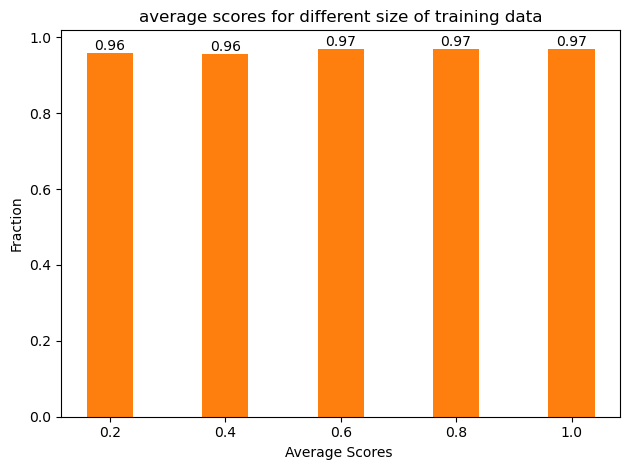

In [683]:
# I create a new list for modified key name, because the models names are too long
modified_keys = []
for key in data.keys():
    if str(key) == "MultiOutputClassifier(estimator=SGDClassifier(loss='log_loss'))":
        modified_keys.append('SGDC')
    elif str(key) == "MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))":
        modified_keys.append('Rand_Forest')
    else:
        modified_keys.append('KNN')


# Here I calculate mean values for the original keys
frac_list=[.2,.4,.6,.8,1.0]
model_scores=[j for i,j in data.items()]
k=0
avg=[]
while k<5:
    avg.append(np.mean([value[k] for value in model_scores]))
    k+=1
print(avg)
# The  bar chart
plt.bar(frac_list, avg, width=.08)
bars=plt.bar(frac_list, avg, width=.08)
plt.xlabel('Average Scores ')
plt.ylabel('Fraction')
plt.title('average scores for different size of training data')

for i, bar in enumerate(bars):
    yval = avg[i]  # Use the exact value from avg list
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


[0.99, 0.99, 0.99, 0.99, 0.99]


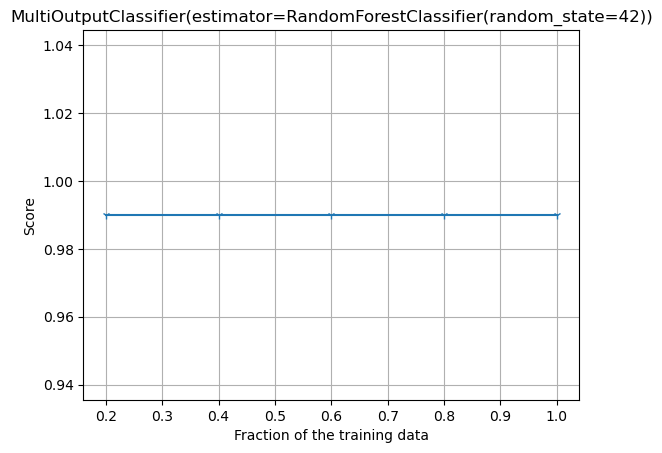

[0.95, 0.97, 0.97, 0.98, 0.98]


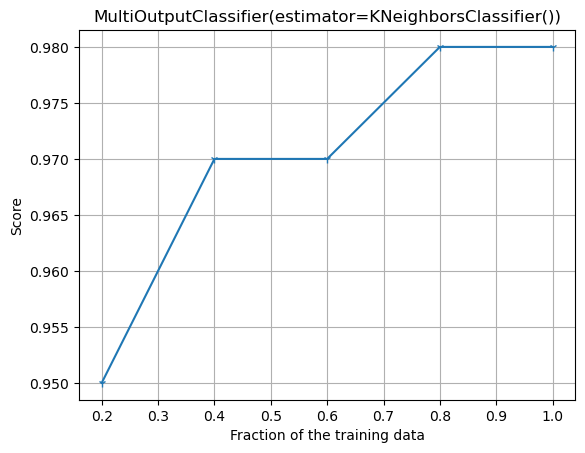

[0.94, 0.91, 0.95, 0.94, 0.94]


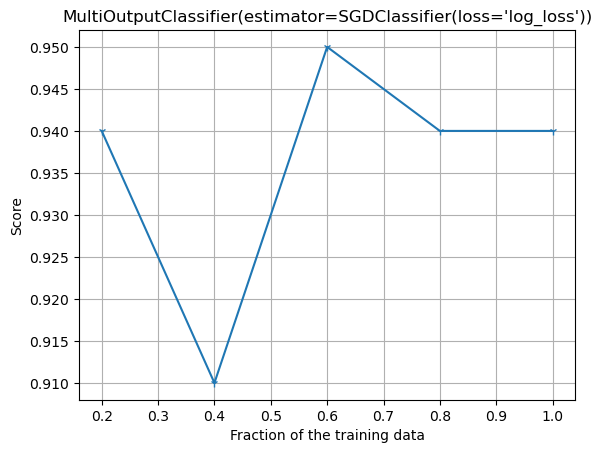

In [575]:
for i,j in data.items():
    x=[0.2,0.4,0.6,0.8,1.0]
    print(j)
    plt.plot(x, j, marker='1')
    plt.xlabel('Fraction of the training data')
    plt.ylabel('Score')
    plt.title(i)
    plt.grid()
    plt.show()